# Exploratory Data Analysis

In [1]:
!pip install pandas_profiling
!pip install sweetviz

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'E:\\DS\\Lib\\site-packages\\~arkupsafe\\_speedups.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=2980d2a6bd236cb6cea7b346626d10ca5d3d3356cdfbd7d54c52d5e628419548
  Stored in directory: c:\users\yashodip\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=9339d0acdf50ef222ed8a78d8e4b504568315e4fa6c2424ec7b6fdd95115f4b9
  Stored in directory: c:\users\yashodip\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("D:\BCA\Data Science Excelr\Data Sets\data_clean.csv")

In [4]:
data.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [5]:
data.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [7]:
#data type
data.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.shape

(158, 10)

# Drop Columns

In [10]:
data2 = data.drop('Unnamed: 0',axis=1)

In [11]:
data2.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


# Rename Column

In [12]:
data3 = data2.rename({'Solar.R':'Solar'},axis=1)
data3.head()

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S


# Data type conversion

In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar    151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 11.2+ KB


In [46]:
data3['Temp C']=pd.to_numeric(data3['Temp C'],errors='coerce')
data3['Month']=pd.to_numeric(data3['Month'],errors='coerce')
data3['Weather']=data3.astype('category')

In [15]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar    151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   157 non-null    float64
 4   Month    157 non-null    float64
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  120 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 11.2+ KB


# Duplicates

In [20]:
#count duplicates rows
data3[data3.duplicated()].shape
data3.shape

(158, 9)

In [17]:
#print duplicates rows
data3.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153     True
154     True
155     True
156     True
157     True
Length: 158, dtype: bool

In [18]:
data4 = data3.drop_duplicates()

In [19]:
data4.shape

(153, 9)

# Outlier Detection

In [21]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar    146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp C   152 non-null    float64
 4   Month    152 non-null    float64
 5   Day      153 non-null    int64  
 6   Year     153 non-null    int64  
 7   Temp     153 non-null    int64  
 8   Weather  116 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 12.0+ KB


<AxesSubplot:>

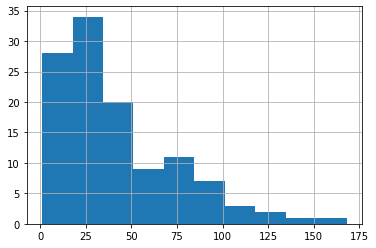

In [22]:
#histrogram for ozone
data4['Ozone'].hist()

<AxesSubplot:>

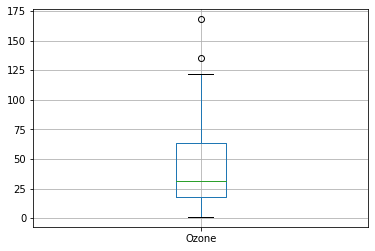

In [23]:
#box plot
data4.boxplot(column=['Ozone'])

<AxesSubplot:>

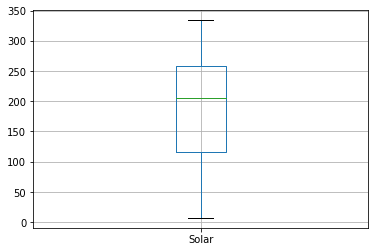

In [24]:
data4.boxplot(column=['Solar'])

<AxesSubplot:>

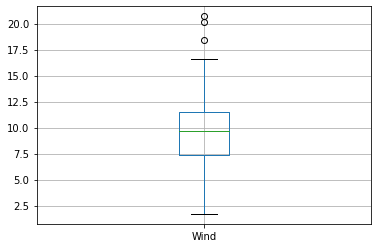

In [25]:
data4.boxplot(column=['Wind'])

<AxesSubplot:>

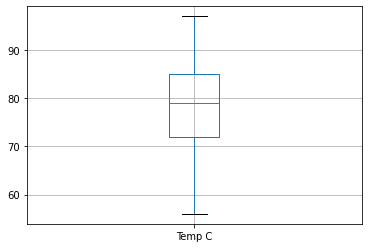

In [26]:
data4.boxplot(column=['Temp C'])

In [27]:
#descriptive stat
data4['Ozone'].describe()

count    116.000000
mean      42.129310
std       32.987885
min        1.000000
25%       18.000000
50%       31.500000
75%       63.250000
max      168.000000
Name: Ozone, dtype: float64

<AxesSubplot:>

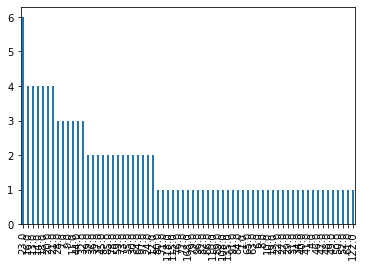

In [29]:
#bat plot
data4['Weather'].value_counts().plot.bar()

# Missing Values and imputation

In [30]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar    146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp C   152 non-null    float64
 4   Month    152 non-null    float64
 5   Day      153 non-null    int64  
 6   Year     153 non-null    int64  
 7   Temp     153 non-null    int64  
 8   Weather  116 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 12.0+ KB


In [35]:
mean = data4['Ozone'].mean()
b = data4['Solar'].mean()
c = data4['Temp C'].mean()
d = data4['Month'].mean()


In [39]:
data4['Ozone'] = data4['Ozone'].fillna(mean)
data4['Solar'] = data4['Solar'].fillna(b)
data4['Temp C'] = data4['Temp C'].fillna(c)
data4['Month'] = data4['Month'].fillna(c)

<ipython-input-39-f4c8893fd7df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Ozone'] = data4['Ozone'].fillna(mean)
<ipython-input-39-f4c8893fd7df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Solar'] = data4['Solar'].fillna(b)
<ipython-input-39-f4c8893fd7df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [38]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    float64
 1   Solar    153 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp C   153 non-null    float64
 4   Month    153 non-null    float64
 5   Day      153 non-null    int64  
 6   Year     153 non-null    int64  
 7   Temp     153 non-null    int64  
 8   Weather  116 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 12.0+ KB


In [40]:
data4['Weather'].value_counts()

23.0     6
16.0     4
13.0     4
14.0     4
18.0     4
        ..
49.0     1
50.0     1
52.0     1
61.0     1
122.0    1
Name: Weather, Length: 67, dtype: int64

In [43]:
data4['Weather'] = data4['Weather'].fillna(23.0)

<ipython-input-43-701a7f359550>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Weather'] = data4['Weather'].fillna(23.0)


In [48]:
data4['Weather'] = data4['Weather'].astype('category')
data4.info()
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    153 non-null    float64 
 1   Solar    153 non-null    float64 
 2   Wind     153 non-null    float64 
 3   Temp C   153 non-null    float64 
 4   Month    153 non-null    float64 
 5   Day      153 non-null    int64   
 6   Year     153 non-null    int64   
 7   Temp     153 non-null    int64   
 8   Weather  153 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 13.5 KB


# Scatter plot and correlation analysis

In [49]:
import seaborn as sns

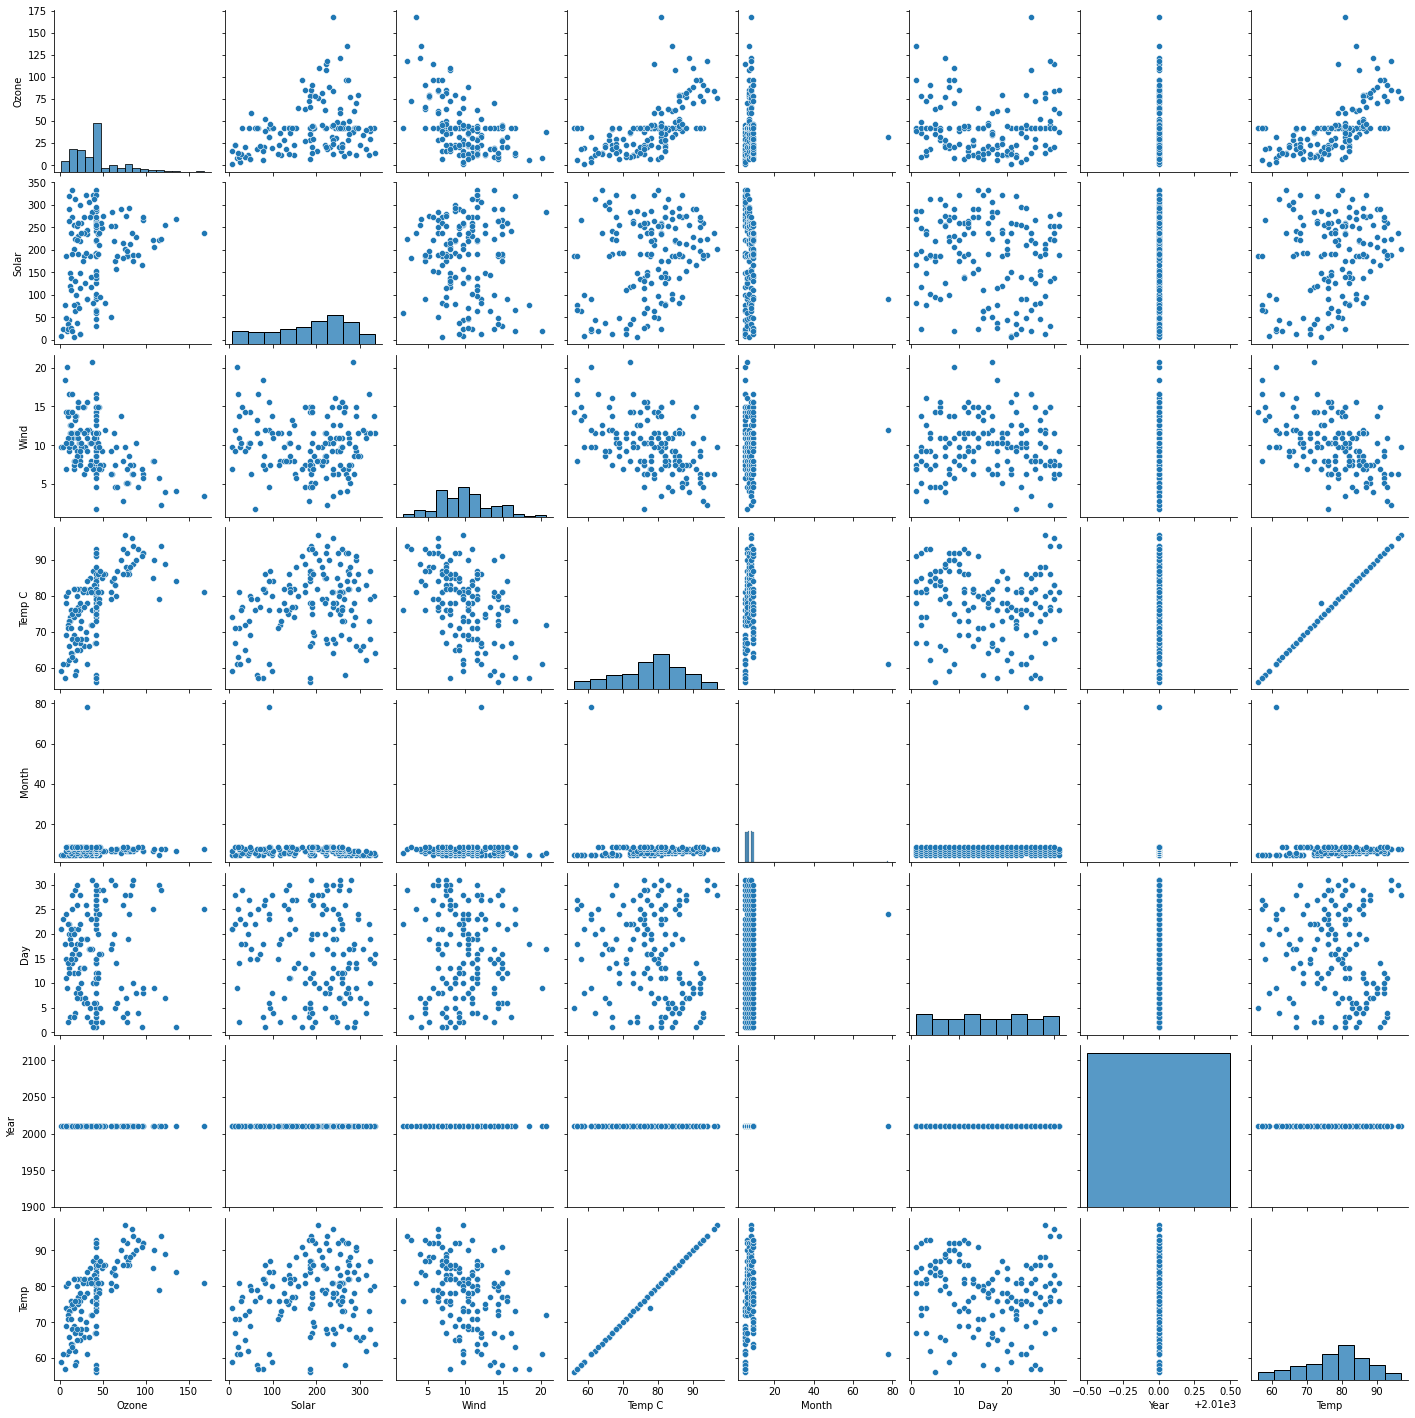

In [50]:
sns.pairplot(data4)